Epoch 1/100
140/140 [==============================] - 2s 7ms/step - loss: 3.6992 - accuracy: 0.3461 - val_loss: 1.4066 - val_accuracy: 0.5134
Epoch 2/100
140/140 [==============================] - 1s 4ms/step - loss: 1.3781 - accuracy: 0.5411 - val_loss: 1.2417 - val_accuracy: 0.6000
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 1.0827 - accuracy: 0.6155 - val_loss: 0.9940 - val_accuracy: 0.6482
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 0.9781 - accuracy: 0.6503 - val_loss: 0.9539 - val_accuracy: 0.6482
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 0.8975 - accuracy: 0.6894 - val_loss: 0.8454 - val_accuracy: 0.7143
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 0.8312 - accuracy: 0.7037 - val_loss: 0.8091 - val_accuracy: 0.7241
Epoch 7/100
140/140 [==============================] - 0s 2ms/step - loss: 0.8025 - accuracy: 0.7059 - val_loss: 0.7503 - val_accuracy: 0.7179

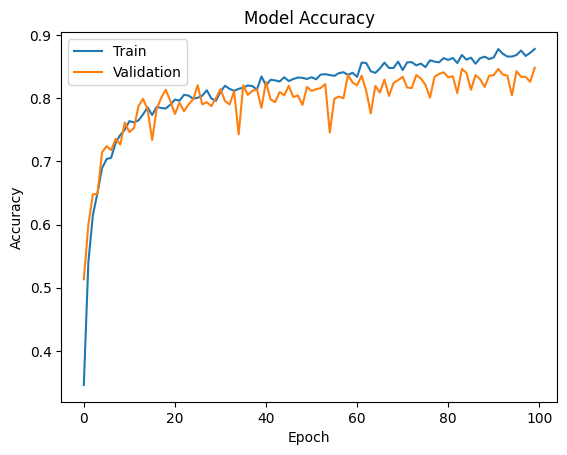

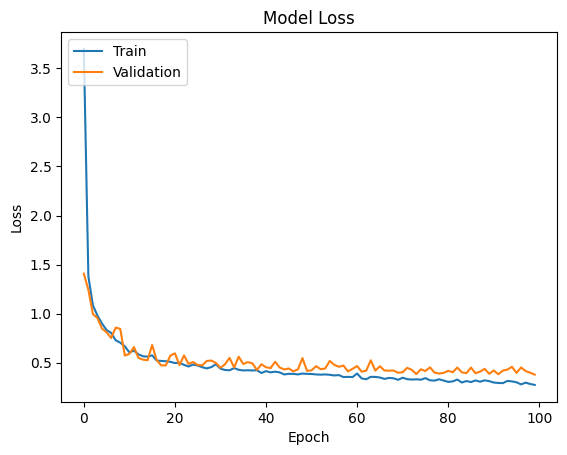

44/44 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.8657
Точность модели на тестовой выборке: 86.57


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Загрузка базы данных из Excel
data = pd.read_excel('dataBase.xlsx')

# Удаление нулевой строки
data = data.iloc[1:]

# Определение входных и выходных данных
features = data.iloc[:, :24]  # Выбираем столбцы с 1 по 24
labels = data.iloc[:, 26]    # Выбираем столбец 26

# Предобработка категориальной переменной "пол"
le = LabelEncoder()
features['пол'] = le.fit_transform(features['пол'])

# Преобразование меток классов в one-hot encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)

# Разделение на обучающую, тестовую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(features, labels_one_hot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Создание нейронной сети
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=24))
model.add(Dense(64, activation='relu'))
model.add(Dense(13, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# сохранение модели
model.save('model1.h5')

# График точности модели на обучающей и валидационной выборках
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# График потерь модели на обучающей и валидационной выборках
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Оценка модели на тестовой выборке
_, accuracy = model.evaluate(X_test, y_test)
print('Точность модели на тестовой выборке: %.2f' % (accuracy * 100))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

# Загрузка базы данных из Excel
data = pd.read_excel('input.xlsx')

# Определение входных данных
features = data.iloc[:, :24]  # Выбираем столбцы с 0 по 23

# Предобработка категориальной переменной "пол"
le = LabelEncoder()
features['пол'] = le.fit_transform(features['пол'])

# Загрузка сохраненной модели
model = load_model('model1.h5')

# Предсказание вероятностей принадлежности к классам для входных данных
y_pred_prob = model.predict(features)

# Получение индексов классов с наибольшими вероятностями
y_pred = np.argmax(y_pred_prob, axis=1)

# Получение значений классов из загружаемой базы данных
labels = data.iloc[:, 26]

# Вывод точности
column_26_values = y_pred

real_values = []
predicted_values = []

for i in labels:
    real_values.append(i)

label_encoder = LabelEncoder()
label_encoder.fit(real_values)
predicted_values = label_encoder.inverse_transform(column_26_values)

accuracy = (len(real_values) - np.count_nonzero(real_values != predicted_values)) / len(real_values)

print("Точность на новых данных составляет: {:.2%}".format(accuracy))
print("Реальные значения:")
print(real_values)
print("Предсказанные значения:")
print(predicted_values)

4/4 [==============================] - 0s 4ms/step
Точность на новых данных составляет: 84.00%
Реальные значения:
['пневмония, антимикробные препараты, респираторная поддержка, неантибактериальная терапия', 'ишемическая болезнь сердца, медикаментозное лечение, консультация специалиста для хирургического вмешательства', 'почечная недостаточность, соблюдение диеты, полное обследование для выявления заболевания вызвавшего почечную недостаточность', 'риск диабета, сбалансированная диета и физические нагрузки', 'здоров, лечение не требуется', 'гипотериоз повышенная активность, пожизненная заместительная терапия', 'здоров, лечение не требуется', 'диабет, сульфонилмочевинные препараты, физические нагрузки и соблюдение диеты', 'ревматоидный артрит, применение базисные противовоспалительные препараты и биологическая терапия ревматойдного артрита', 'гипотериоз пониженная активность, поддержание уровня ТТГ в пределах 0,5-1,5 мМЕ/л.', 'есть отклонения, рекомендуется обратиться к врачу', 'почечная 